In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ssh-keygen -t ed25519 -C "ssriraman8@gatech.edu"

In [ ]:
!cat ~/.ssh/id_ed25519.pub

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

In [ ]:
!ssh -vT git@github.com

In [6]:
!git clone --recurse-submodules git@github.com:archana53/diffusion-itm.git --branch train_final

Cloning into 'diffusion-itm'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 342 (delta 78), reused 117 (delta 67), pack-reused 204
Receiving objects: 100% (342/342), 40.59 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (153/153), done.
Submodule 'diffusers' (git@github.com:McGill-NLP/diffusers.git) registered for path 'diffusers'
Cloning into '/content/diffusion-itm/diffusers'...
remote: Enumerating objects: 23500, done.        
remote: Counting objects: 100% (1/1), done.        
remote: Total 23500 (delta 0), reused 0 (delta 0), pack-reused 23499        
Receiving objects: 100% (23500/23500), 18.77 MiB | 13.76 MiB/s, done.
Resolving deltas: 100% (16062/16062), done.
Submodule path 'diffusers': checked out '8ad50fd43f1739b3808cca6564b69bc77ddabdbc'


In [7]:
!mkdir -p ~/diffusers

In [8]:
!env --chdir=/content/diffusion-itm/diffusers -S python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [9]:
!git lfs install

Git LFS initialized.


In [10]:
!git clone https://huggingface.co/sidsr/hard-neg-checkpoints

Cloning into 'hard-neg-checkpoints'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (167/167), done.
remote: Total 170 (delta 0), reused 0 (delta 0), pack-reused 3
Receiving objects: 100% (170/170), 23.71 KiB | 23.71 MiB/s, done.
Filtering content: 100% (144/144), 339.68 MiB | 206.67 MiB/s, done.


In [11]:
!mv hard-neg-checkpoints diffusion-itm/checkpoints/final_runs/

In [12]:
!env --chdir=/content/diffusion-itm/ -S pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 118.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [13]:
!pip install "jax[cuda12_local]==0.4.23" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html

Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
    Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26


In [14]:
# Update token in datasets_loading.py

!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credent

In [46]:
!env --chdir=/content/diffusion-itm/ -S sh setup.sh

Streaming output truncated to the last 5000 lines.
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img1.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img8.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img3.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img4.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img9.jpg  
  inflating: data/imagecode/image-sets/open-images-2313_d9f217faa5ecdf52/img2.jpg  
   creating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/img6.jpg  
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/img39.jpg  
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-shot2_0/img34.jpg  
  inflating: data/imagecode/image-sets/MSR-VTT-videoTrainValVideo_video939-sh

In [52]:
# !diff \
# ./diffusion-itm/checkpoints/soft-neg-ckpt-9k/hard-neg-ckpt/checkpoint-8500/pytorch_model.bin \
# ./diffusion-itm/hard_ft_logs_2_gpu/checkpoint-10/pytorch_model.bin

Binary files ./diffusion-itm/checkpoints/soft-neg-ckpt-9k/hard-neg-ckpt/checkpoint-8500/pytorch_model.bin and ./diffusion-itm/hard_ft_logs_2_gpu/checkpoint-10/pytorch_model.bin differ


In [15]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00


In [16]:
!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [17]:
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [33]:
!env --chdir=/content/diffusion-itm/ -S accelerate launch --config_file ./configs/8_gpu.yaml hard_neg_finetuning.py \
 --pretrained_model_name_or_path "runwayml/stable-diffusion-v1-5" \
 --train_batch_size 4 \
 --output_dir 'hard_ft_main_run' \
 --checkpointing_steps 200 \
 --num_train_epochs 2 \
 --report_to 'wandb' \
 --mixed_precision 'fp16' \
 --hard_neg \
 --enable_xformers_memory_efficient_attention

2024-04-18 20:40:32.135559: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 20:40:32.135611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 20:40:32.137001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 20:40:32.144759: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 20:40:33.175718: W tensorflow/comp

### Soft Neg

In [42]:
!env --chdir=/content/diffusion-itm/ -S accelerate launch --config_file ./configs/8_gpu.yaml soft_neg_finetuning.py \
 --pretrained_model_name_or_path "runwayml/stable-diffusion-v1-5" \
 --train_batch_size 4 \
 --output_dir 'soft_ft_main_run' \
 --checkpointing_steps 200 \
 --num_train_epochs 2 \
 --report_to 'wandb' \
 --mixed_precision 'fp16' \
 --hard_neg \
 --enable_xformers_memory_efficient_attention

2024-04-18 22:02:02.546289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 22:02:02.546343: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 22:02:02.547741: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 22:02:02.555818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 22:02:03.721097: W tensorflow/comp

In [26]:
!ls ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000449238.jpg

./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000449238.jpg


In [18]:
!mkdir ./diffusion-itm/data/mscoco

In [23]:
!mv /content/drive/MyDrive/MSCOCO/train2014.zip ./diffusion-itm/data/mscoco

In [ ]:
#!unzip -u ./diffusion-itm/data/mscoco/val2014.zip -d ./diffusion-itm/data/mscoco

In [24]:
!unzip -u ./diffusion-itm/data/mscoco/train2014.zip -d ./diffusion-itm/data/mscoco

Streaming output truncated to the last 5000 lines.
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000408557.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000013714.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000194043.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000219859.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000278135.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000141015.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000280923.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000200024.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000435713.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000249993.jpg  
 extracting: ./diffusion-itm/data/mscoco/train2014/COCO_train2014_000000424160.jpg  
 extracting: .

In [44]:
!env --chdir=/content/diffusion-itm/ -S \
    python3 diffusion_itm.py \
    --task winoground \
    --version 1.5 \
    --img_retrieval \
    --load_from_ckpt ./hard_ft_main_run/checkpoint-4000/pytorch_model.bin

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2024-04-18 23:03:38.542226: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 23:03:38.542278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 23:03:38.543648: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 23:03:38.551001: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optim

In [64]:
!env --chdir=/content/diffusion-itm/ -S \
    python3 diffusion_itm.py \
    --task winoground \
    --version 1.5 \
    --img_retrieval \
    --load_from_ckpt ./hard_ft_main_run/checkpoint-4000/pytorch_model.bin

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2024-04-19 01:30:02.856122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 01:30:02.856184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 01:30:02.857809: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-19 01:30:02.866129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optim

In [ ]:
!env --chdir=/content/diffusion-itm/ -S \
    python3 diffusion_itm.py \
    --task winoground \
    --version 1.5 \
    --img_retrieval \
    --load_from_ckpt ./hard_ft_main_run/checkpoint-4000/pytorch_model.bin

In [45]:
!env --chdir=/content/diffusion-itm/ -S \
    python3 diffusion_itm.py \
    --task winoground \
    --version 1.5 \
    --img_retrieval \
    --load_from_ckpt ./soft_ft_main_run/checkpoint-4000/pytorch_model.bin

/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
2024-04-18 23:30:43.986601: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 23:30:43.986653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 23:30:43.988189: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 23:30:43.996120: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optim

In [43]:
from huggingface_hub import HfApi
api = HfApi(token="")

api.upload_folder(
    folder_path="./diffusion-itm/soft_ft_main_run",
    path_in_repo='final_runs/soft_ft_main_run',
    repo_id="sidsr/hard-neg-checkpoints",
    repo_type="model",
)

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

Upload 65 LFS files:   0%|          | 0/65 [00:00<?, ?it/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

scaler.pt:   0%|          | 0.00/988 [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

optimizer.bin:   0%|          | 0.00/6.59M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/sidsr/hard-neg-checkpoints/commit/beb286fd9ddb31a75f66ad4fcbc3e4850ad1c373', commit_message='Upload folder using huggingface_hub', commit_description='', oid='beb286fd9ddb31a75f66ad4fcbc3e4850ad1c373', pr_url=None, pr_revision=None, pr_num=None)

In [43]:
#!mkdir /content/drive/MyDrive/MSCOCO/val2014

In [ ]:
#!unzip -u /content/drive/MyDrive/MSCOCO/train2014.zip -d /content/drive/MyDrive/MSCOCO

In [ ]:
#!unzip -u /content/drive/MyDrive/MSCOCO/val2014.zip -d /content/drive/MyDrive/MSCOCO

In [ ]:
from dataset_loading import get_dataset

In [ ]:
dataset = get_dataset('winoground', 'data', transform=None, targets='')

dataloader = DataLoader(dataset, batch_size=4, shuffle=False, num_workers=0)


In [ ]:
import matplotlib.pyplot as plt


def get_batch(i, args, batch, model):
    """
    Takes a batch of images and captions and returns a score for each image-caption pair.
    """

    imgs, texts = batch[0], batch[1]
    imgs, imgs_resize = imgs[0], imgs[1]
    imgs_resize = [img.cuda() for img in imgs_resize]

    scores = []
    for txt_idx, text in enumerate(texts):
        for img_idx, resized_img in enumerate(imgs_resize):
            if len(resized_img.shape) == 3:
                resized_img = resized_img.unsqueeze(0)

            print(f'Batch {i}, Text {txt_idx}, Image {img_idx}')
            print(text[0])

            plt.imshow(resized_img[0].cpu().numpy().transpose(1, 2, 0))
            plt.axis('off')  # Turn off axis
            plt.show()

    #         dists = model(prompt=list(text), image=resized_img, guidance_scale=args.guidance_scale, sampling_steps=args.sampling_steps, unconditional=args.img_retrieval)
    #         dists = dists.to(torch.float32)
    #         dists = dists.mean(dim=1)
    #         dists = -dists
    #         scores.append(dists)

    # scores = torch.stack(scores).permute(1, 0) if args.batchsize > 1 else torch.stack(scores).unsqueeze(0)
    return scores


Batch 0, Text 0, Image 0
an old person kisses a young person


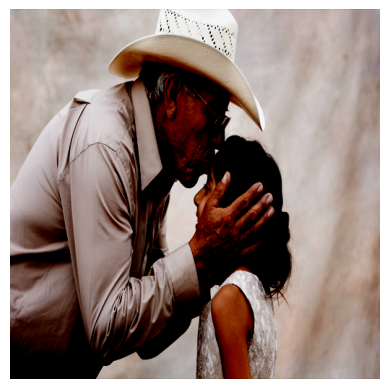

Batch 0, Text 0, Image 1
an old person kisses a young person


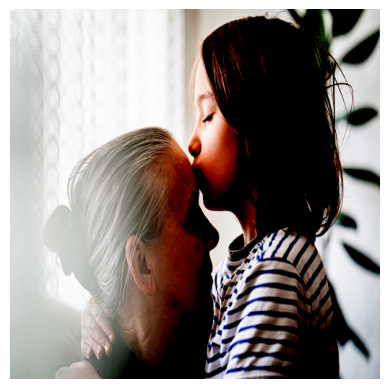

Batch 0, Text 1, Image 0
a young person kisses an old person


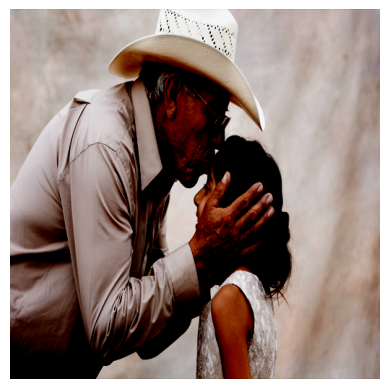

Batch 0, Text 1, Image 1
a young person kisses an old person


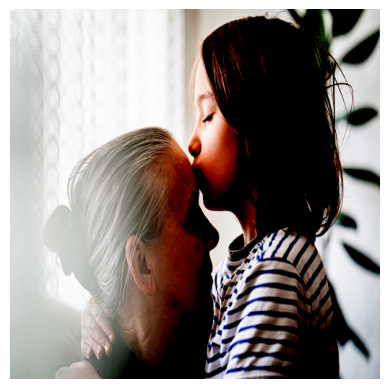

In [ ]:
sampled_images = []
for obj in dataloader:
    get_batch(0, {}, obj, None)
    break
    # for image, label in zip(images, labels):
    #     sampled_images.append((image, label))
    #     if len(sampled_images) >= 5:
    #         break
    # if len(sampled_images) >= 5:
    #     break